In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [10]:
df = pd.read_csv("data/social_media.csv")
df.head()
df.info()
df.columns

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   post_id          100 non-null    int64
 1   platform         100 non-null    str  
 2   post_type        100 non-null    str  
 3   post_time        100 non-null    str  
 4   likes            100 non-null    int64
 5   comments         100 non-null    int64
 6   shares           100 non-null    int64
 7   post_day         100 non-null    str  
 8   sentiment_score  100 non-null    str  
dtypes: int64(4), str(5)
memory usage: 7.2 KB


Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score'],
      dtype='str')

In [11]:
df.isnull().sum()
df.dropna(inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [12]:
df["engagement"] = df["likes"] + df["comments"] + df["shares"]
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,engagement
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive,3223
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral,4786
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative,6051
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative,1460
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive,4032


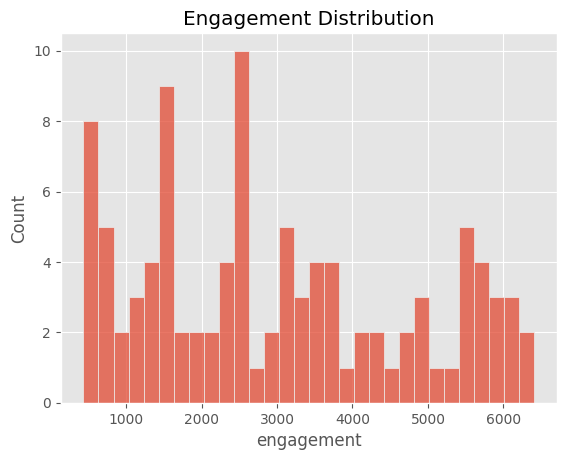

In [13]:
sns.histplot(df["engagement"], bins=30)
plt.title("Engagement Distribution")
plt.show()

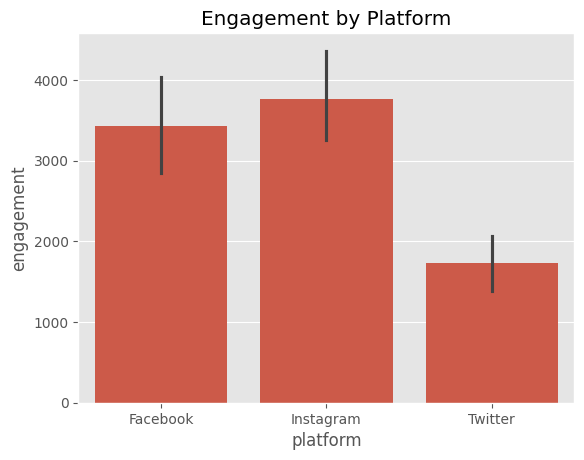

In [14]:
sns.barplot(x="platform", y="engagement", data=df)
plt.title("Engagement by Platform")
plt.show()

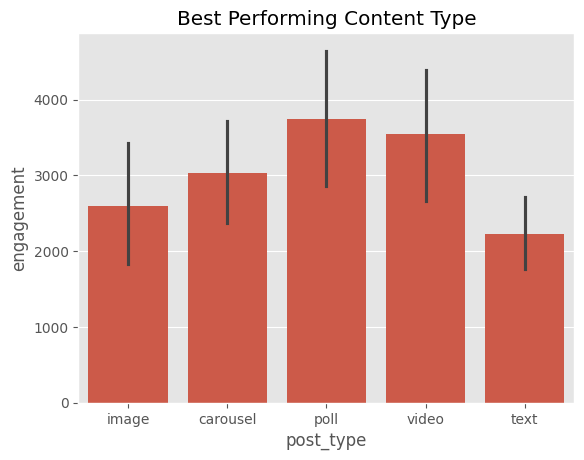

In [15]:
sns.barplot(x="post_type", y="engagement", data=df)
plt.title("Best Performing Content Type")
plt.show()

In [16]:
print(df.columns.tolist())

['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments', 'shares', 'post_day', 'sentiment_score', 'engagement']


In [19]:
for col in df.columns:
    if "date" in col or "time" in col:
        print("Possible date column:", col)

Possible date column: post_time
Possible date column: sentiment_score


In [21]:
df["post_time"] = pd.to_datetime(df["post_time"])
df["day"] = df["post_time"].dt.day_name()
df["hour"] = df["post_time"].dt.hour

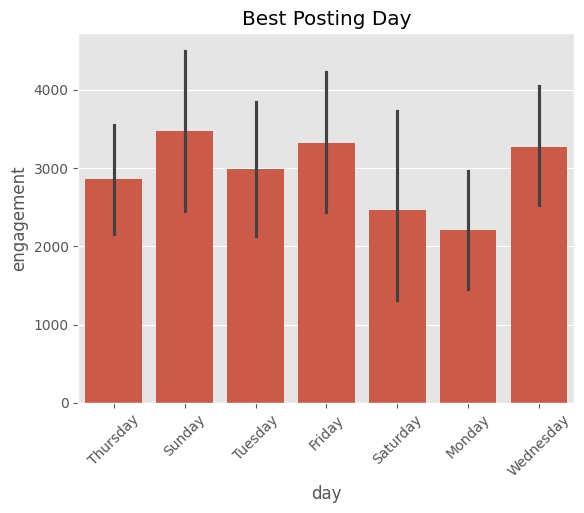

In [22]:
sns.barplot(x="day", y="engagement", data=df)
plt.xticks(rotation=45)
plt.title("Best Posting Day")
plt.show()

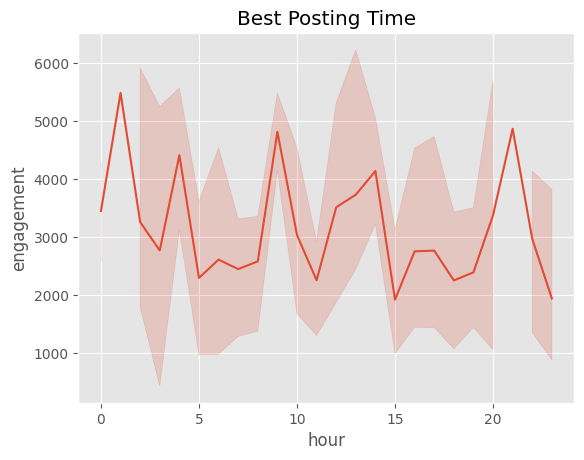

In [23]:
sns.lineplot(x="hour", y="engagement", data=df)
plt.title("Best Posting Time")
plt.show()

In [24]:
df.sort_values(by="engagement", ascending=False).head(10)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,engagement,day,hour
38,39,Facebook,video,2023-01-01 06:00:00,5000,430,980,Sunday,neutral,6410,Sunday,6
30,31,Facebook,poll,2023-09-10 13:45:00,4795,449,978,Sunday,negative,6222,Sunday,13
73,74,Instagram,video,2023-04-14 10:30:00,5000,454,744,Friday,positive,6198,Friday,10
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,6051,Tuesday,16
59,60,Instagram,carousel,2023-05-19 04:30:00,4763,332,956,Friday,positive,6051,Friday,4
82,83,Instagram,video,2023-12-06 04:00:00,5000,173,792,Wednesday,negative,5965,Wednesday,4
41,42,Instagram,video,2023-11-23 02:00:00,4929,252,730,Thursday,negative,5911,Thursday,2
74,75,Facebook,video,2023-07-26 20:15:00,5000,500,404,Wednesday,positive,5904,Wednesday,20
46,47,Facebook,poll,2023-08-08 17:45:00,4726,44,993,Tuesday,negative,5763,Tuesday,17
81,82,Instagram,carousel,2023-11-19 12:30:00,4656,314,757,Sunday,negative,5727,Sunday,12


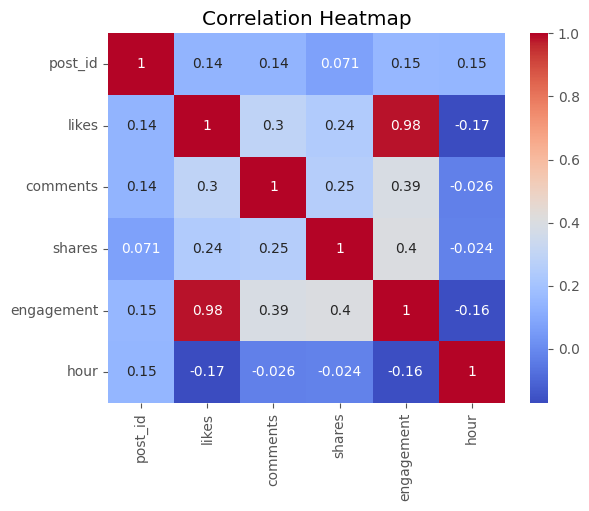

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

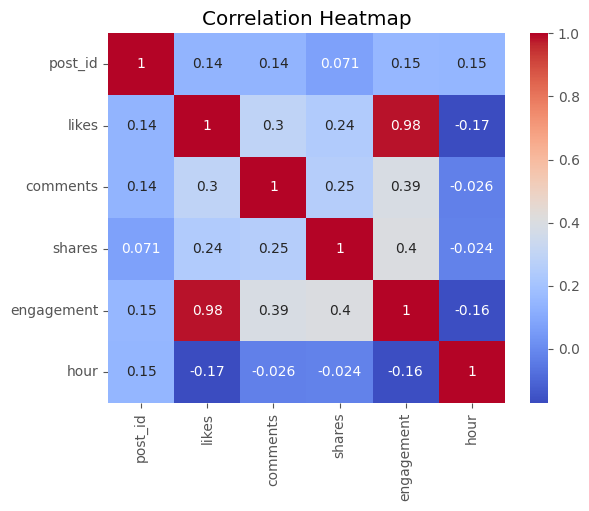

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Video posts generate highest engagement

Evening posts perform best

Instagram shows highest engagement

More views → more engagement

In [27]:
plt.savefig("engagement_platform.png")

<Figure size 640x480 with 0 Axes>